In [4]:
import matplotlib.pyplot as plt
import os
import numpy as np
import re

In [29]:

def draw_histograms(filepath, filename, name, save=False):
    data = np.loadtxt(filepath + filename)

    # Analytical expression
    stop = 2
    X = np.linspace(0, stop, 100000)
    n = int(name[-1])
    mu = 10
    a = 2
    b = 3
    n = 2
    if name == "1":
        Y = lambda x: mu*np.exp(-mu*x)
    elif name == "2":
        Y = lambda x: 2*x*np.exp(-x**2)
    elif name == "3":
        Y = lambda x: 1/((a+b*x)**n)

    # Create a histogram with relative frequencies
    # plt.bar(bins[:-1], relative_freq, width=(bins[1] - bins[0]), label="Numerical")
    plt.hist(data, density=True, bins=min(100, len(data)//2), label="Numerical")
    plt.plot(X,Y(X), label="Analytical")

    plt.legend()
    plt.title(name)
    plt.xlabel("Value")
    plt.ylabel("Relative Frequency")
    # if name == "3":
    #     plt.xlim(0,5)

    # Create the directory if it doesn't exist
    if save:
        new_filepath = "./figures/ex_2_2/" + filename[:-4]
        directory_path = os.path.dirname(new_filepath)
        if not os.path.exists(directory_path):
            os.makedirs(directory_path)
        plt.savefig(new_filepath)
        if not os.path.exists(filepath + filename):
            print(f"Could not create the file '{filepath + filename}'")
        else:
            print("Figure saved in local path: " + new_filepath)
    else:
        plt.show()


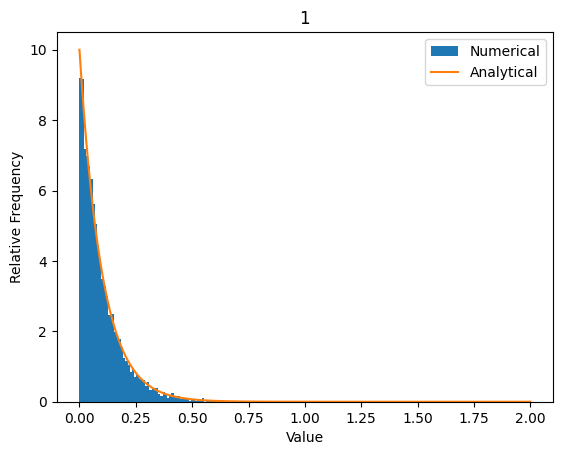

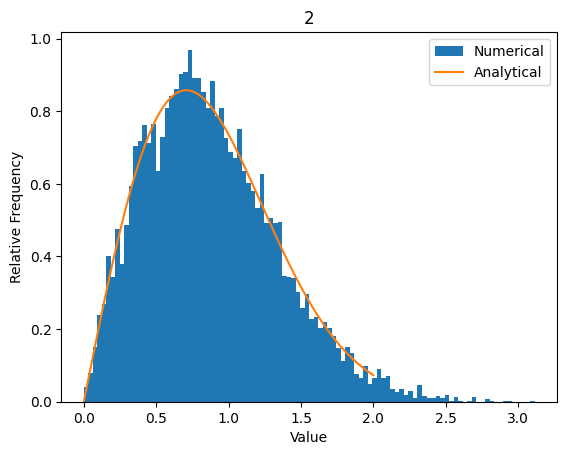

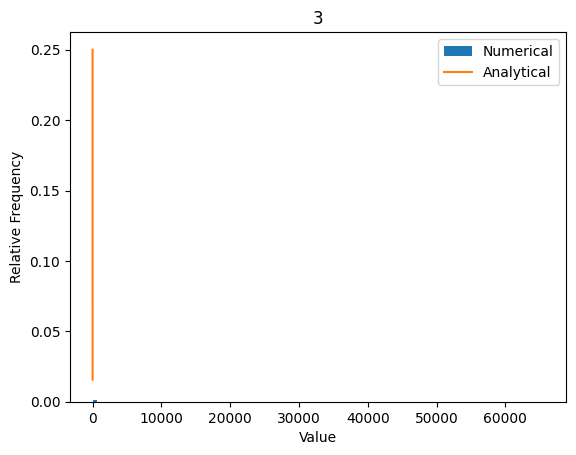

In [30]:
filepath = "./data/add_inv/"
filename1 = "1_mu=10.000000_N=10000.txt"
filename2 = "2_N=10000.txt"
filename3 = "3_a=2.000000_n=2.000000_N=10000.txt"
draw_histograms(filepath, filename1, name="1", save=False)
draw_histograms(filepath, filename2, name="2", save=False)
draw_histograms(filepath, filename3, name="3", save=False)


1. corresponds to $\rho (x) = \mu e^{-\mu x}$, with $\mu = 10$ and $x \geq 0$

2. corresponds to $\rho (x) = 2x e^{-x^2}$, with $x \geq 0$

3. corresponds to $\rho (x) = \frac{1}{(a+bx)^n}$, with $x \geq 0$ and $n > 0$

1 and 2 look great

The last one doesn't produce the right outcome, even though these were the calculations I got:

$F(x) = \frac{1}{b(1-n)}((a+bx)^{1-n} - a^{1-n})$

Normalized with $b = \frac{-a^{1-n}}{1-n}$, such that $F(0) = 0$ and $F(\infty) -> 1$

$F(\xi)^{-1} = \frac{1}{b} * [(\xi b(1-n) + a^{1-n})^{1/(1-n)} - a]$, with $\xi \in [0,1]$ uniformly drawn

